In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
df_index.drop(['Unnamed: 0', 'year','month'], axis=1, inplace=True)

In [4]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

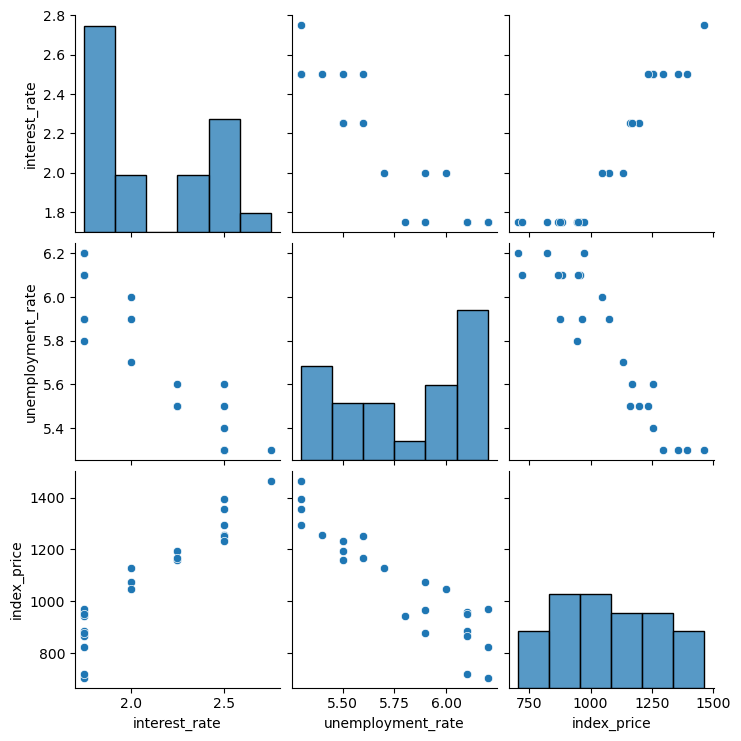

In [6]:
## visualization
import seaborn as sns

sns.pairplot(df_index)

In [7]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

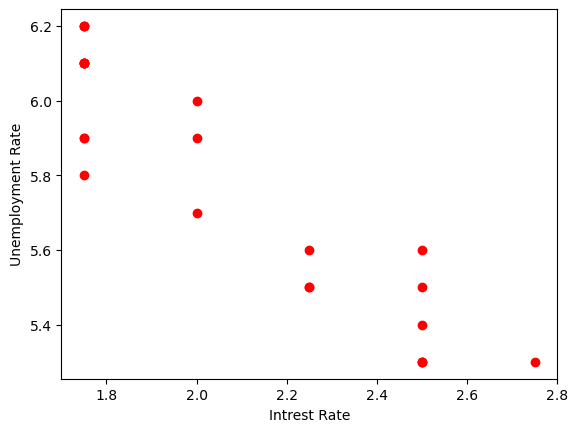

In [8]:
## Visualize the datafpoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], c='red')
plt.xlabel('Intrest Rate')
plt.ylabel('Unemployment Rate')

In [9]:
## indepent and dependent features

X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [10]:
## train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

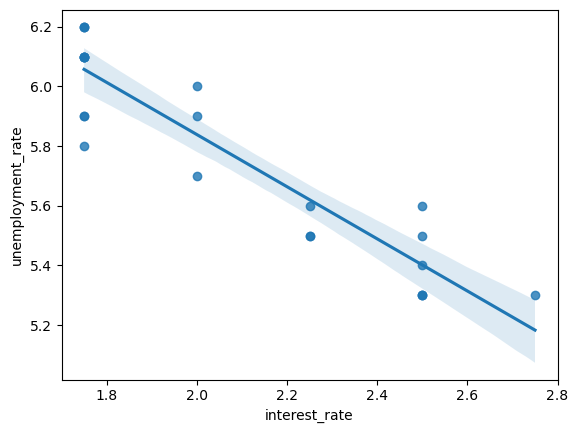

In [11]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

<Axes: xlabel='interest_rate', ylabel='index_price'>

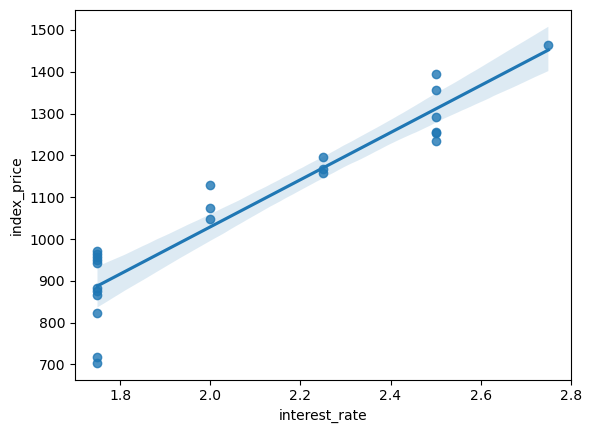

In [12]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [16]:
regression.fit(X_train, y_train)

LinearRegression()

In [17]:
## Cross Validation

from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X=X_train, y=y_train, scoring='neg_mean_squared_error',
                                   cv=3)

In [18]:
np.mean(validation_score)

-5914.828180162396

In [19]:
## Prediction

y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [20]:
## Performance Metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Mean absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 8108.567426306611
Mean absolute Error: 73.80444932337099
Root Mean Squared Error: 90.04758423359624


In [21]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.7591371539010254

In [22]:
# display adjusted R-squared
1 - (1-score) * (len(y_test) - 1)/ (len(y_test) - X_test.shape[1]-1)

0.5985619231683756

## Assumptions


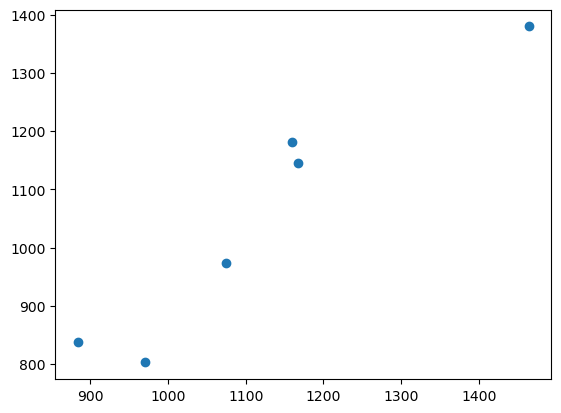

In [23]:
plt.scatter(y_test, y_pred)

In [24]:
residuals = y_test - y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

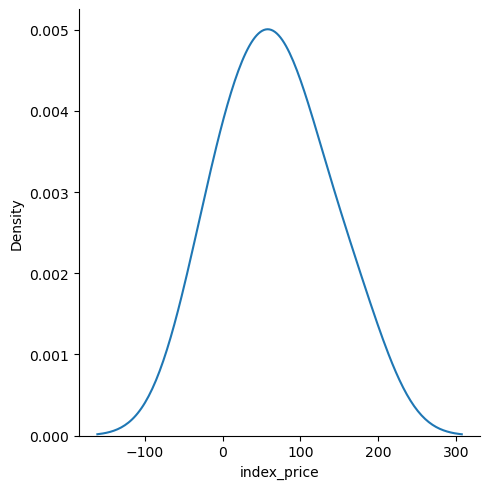

In [25]:
## plot residuals

sns.displot(residuals, kind='kde')

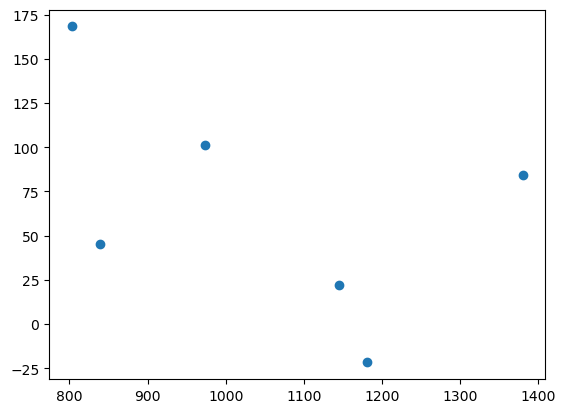

In [26]:
## scatter plot with respect to predictions and residules

plt.scatter(y_pred, residuals)

In [27]:
## OLS Linear Regression
import statsmodels.api as sm

In [28]:
model = sm.OLS(y_train, X_train).fit()

In [29]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 17 Dec 2024   Prob (F-statistic):                       0.754
Time:                        23:20:51   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [30]:
print(regression.coef_)
print(regression.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443
